In [239]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import xgboost
import mediapipe as mp
import cv2
import joblib
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix , f1_score , precision_score

In [532]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

# Loading and Exploring Data

In [528]:
df = pd.read_csv('hand_landmarks_data.csv')
df.head()

,x1,y1,z1,x2,y2,z2,x3,y3,z3,x4,...,x19,y19,z19,x20,y20,z20,x21,y21,z21,label
0,262.669968,257.304901,-3.649205e-07,257.417542,247.109055,0.004224,246.882957,241.716827,0.005798,236.384537,...,223.345093,255.490692,-0.020450,215.043365,258.114746,-0.024577,208.006393,259.608673,-0.026722,call
1,83.351778,346.059113,-2.345265e-07,81.925037,328.562347,-0.011102,90.080132,311.535248,-0.021096,95.641823,...,132.451618,341.794434,-0.038175,142.773582,342.829254,-0.037336,152.431698,343.015991,-0.036136,call
2,187.756977,260.235492,-2.417307e-07,195.460579,241.506035,-0.000184,207.259529,223.674339,-0.009687,215.413628,...,250.301010,268.602938,-0.044068,262.425133,271.276638,-0.040469,272.989952,272.272231,-0.038301,call
3,114.976696,331.594238,-1.233261e-07,114.503494,320.549957,-0.002824,116.636627,310.080994,-0.008911,117.685066,...,145.195450,329.357544,-0.027622,151.053200,329.712341,-0.027863,155.990364,329.548828,-0.027723,call
4,188.795288,141.727867,-1.622995e-07,188.520905,127.947464,-0.002884,191.982880,111.010563,-0.008115,192.552521,...,226.696396,132.263248,-0.025113,234.831741,130.684147,-0.024087,241.587769,128.477188,-0.023486,call


In [242]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25675 entries, 0 to 25674
Data columns (total 64 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      25675 non-null  float64
 1   y1      25675 non-null  float64
 2   z1      25675 non-null  float64
 3   x2      25675 non-null  float64
 4   y2      25675 non-null  float64
 5   z2      25675 non-null  float64
 6   x3      25675 non-null  float64
 7   y3      25675 non-null  float64
 8   z3      25675 non-null  float64
 9   x4      25675 non-null  float64
 10  y4      25675 non-null  float64
 11  z4      25675 non-null  float64
 12  x5      25675 non-null  float64
 13  y5      25675 non-null  float64
 14  z5      25675 non-null  float64
 15  x6      25675 non-null  float64
 16  y6      25675 non-null  float64
 17  z6      25675 non-null  float64
 18  x7      25675 non-null  float64
 19  y7      25675 non-null  float64
 20  z7      25675 non-null  float64
 21  x8      25675 non-null  float64
 22

In [243]:
df.describe()

,x1,y1,z1,x2,y2,z2,x3,y3,z3,x4,...,z18,x19,y19,z19,x20,y20,z20,x21,y21,z21
count,25675.000000,25675.000000,2.567500e+04,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,...,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000
mean,201.958632,260.158527,1.272461e-07,202.517395,252.115322,-0.009465,202.862981,240.645966,-0.015946,203.025267,...,-0.024129,201.792374,227.455597,-0.033751,201.811275,227.802576,-0.032208,201.874802,227.807287,-0.028828
std,90.500333,76.533210,2.737932e-07,84.770933,75.384691,0.010376,80.412089,74.721921,0.013973,79.647588,...,0.015658,94.046497,77.231210,0.020453,93.664595,78.441253,0.020877,93.547017,79.963438,0.021136
min,-36.050926,45.722923,-2.029986e-06,7.184681,51.256840,-0.096630,25.114323,45.489950,-0.155846,23.446341,...,-0.201897,0.198635,20.146784,-0.286821,3.278137,32.158108,-0.286470,-4.537216,23.226204,-0.262047
25%,124.110329,205.815950,-5.243216e-08,130.535929,197.999625,-0.015199,136.711035,187.018583,-0.023020,138.905817,...,-0.030728,126.828913,172.720392,-0.042726,126.887403,172.345467,-0.041957,126.356627,172.083794,-0.039220
50%,199.667847,255.181793,1.497277e-07,199.979530,247.113892,-0.008737,200.092758,235.776978,-0.014231,200.482040,...,-0.020969,197.579865,221.781479,-0.029942,197.591736,222.381149,-0.028510,197.453270,222.485229,-0.025269
75%,266.428482,304.991663,2.989988e-07,261.147457,296.850769,-0.002783,255.876354,284.925993,-0.007134,254.622768,...,-0.013661,268.103920,273.190765,-0.019987,267.745743,274.196884,-0.017971,267.324657,275.805222,-0.014294
max,633.556020,781.674469,1.876254e-06,606.232386,751.869416,0.076365,598.541348,719.365010,0.094131,607.999801,...,0.031774,632.923029,779.419948,0.078105,638.134761,760.854103,0.104580,641.788521,760.554894,0.118668


In [244]:
df['label'].value_counts()

label
three2             1653
palm               1649
four               1634
ok                 1592
stop_inverted      1567
call               1506
peace_inverted     1497
stop               1482
rock               1458
three              1456
peace              1441
like               1436
two_up_inverted    1371
two_up             1343
dislike            1295
one                1263
mute               1087
fist                945
Name: count, dtype: int64

In [530]:
gesture_labels = df['label'].unique()
gesture_labels

array(['call', 'dislike', 'fist', 'four', 'like', 'mute', 'ok', 'one',
       'palm', 'peace', 'peace_inverted', 'rock', 'stop', 'stop_inverted',
       'three', 'three2', 'two_up', 'two_up_inverted'], dtype=object)

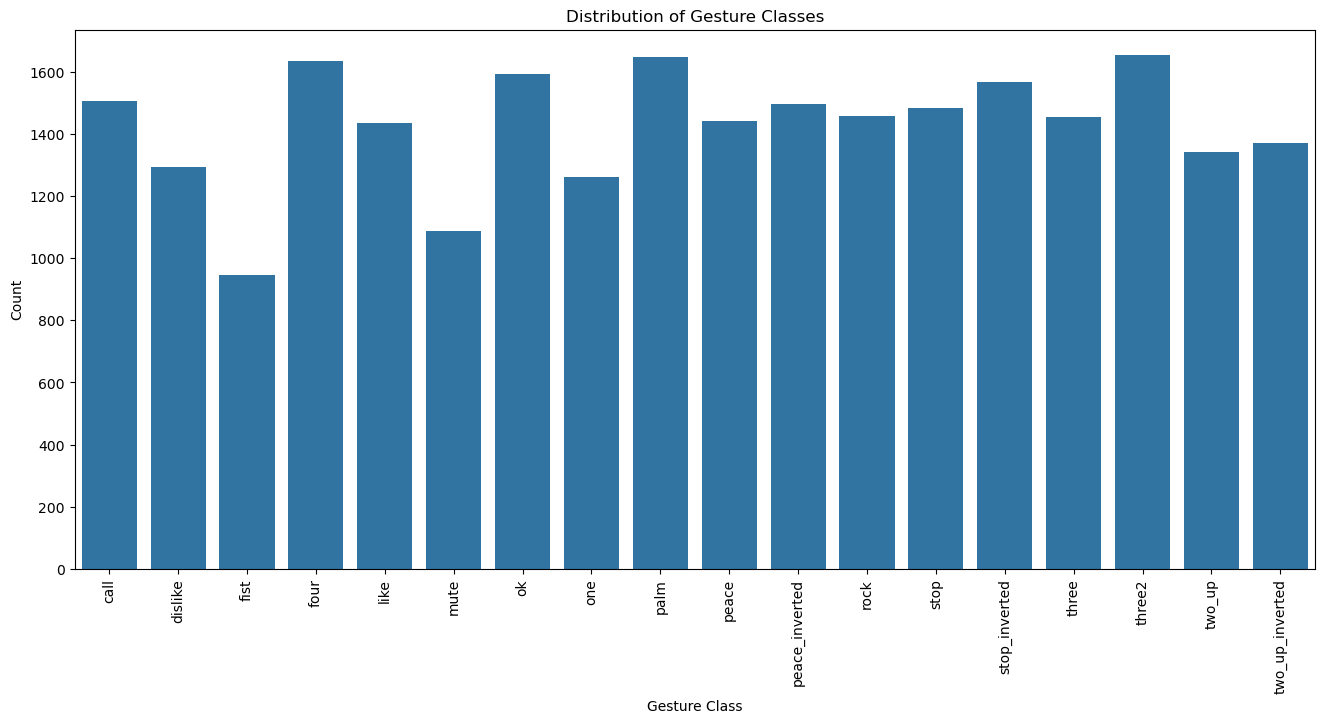

In [246]:
plt.figure(figsize=(16,7))
sns.countplot(x = df['label'])
plt.xticks(rotation = 90)
plt.xlabel("Gesture Class")
plt.ylabel("Count")
plt.title("Distribution of Gesture Classes")
plt.show()

array([[<Axes: title={'center': 'x1'}>, <Axes: title={'center': 'y1'}>,
        <Axes: title={'center': 'z1'}>, <Axes: title={'center': 'x2'}>,
        <Axes: title={'center': 'y2'}>, <Axes: title={'center': 'z2'}>,
        <Axes: title={'center': 'x3'}>, <Axes: title={'center': 'y3'}>],
       [<Axes: title={'center': 'z3'}>, <Axes: title={'center': 'x4'}>,
        <Axes: title={'center': 'y4'}>, <Axes: title={'center': 'z4'}>,
        <Axes: title={'center': 'x5'}>, <Axes: title={'center': 'y5'}>,
        <Axes: title={'center': 'z5'}>, <Axes: title={'center': 'x6'}>],
       [<Axes: title={'center': 'y6'}>, <Axes: title={'center': 'z6'}>,
        <Axes: title={'center': 'x7'}>, <Axes: title={'center': 'y7'}>,
        <Axes: title={'center': 'z7'}>, <Axes: title={'center': 'x8'}>,
        <Axes: title={'center': 'y8'}>, <Axes: title={'center': 'z8'}>],
       [<Axes: title={'center': 'x9'}>, <Axes: title={'center': 'y9'}>,
        <Axes: title={'center': 'z9'}>, <Axes: title={'center

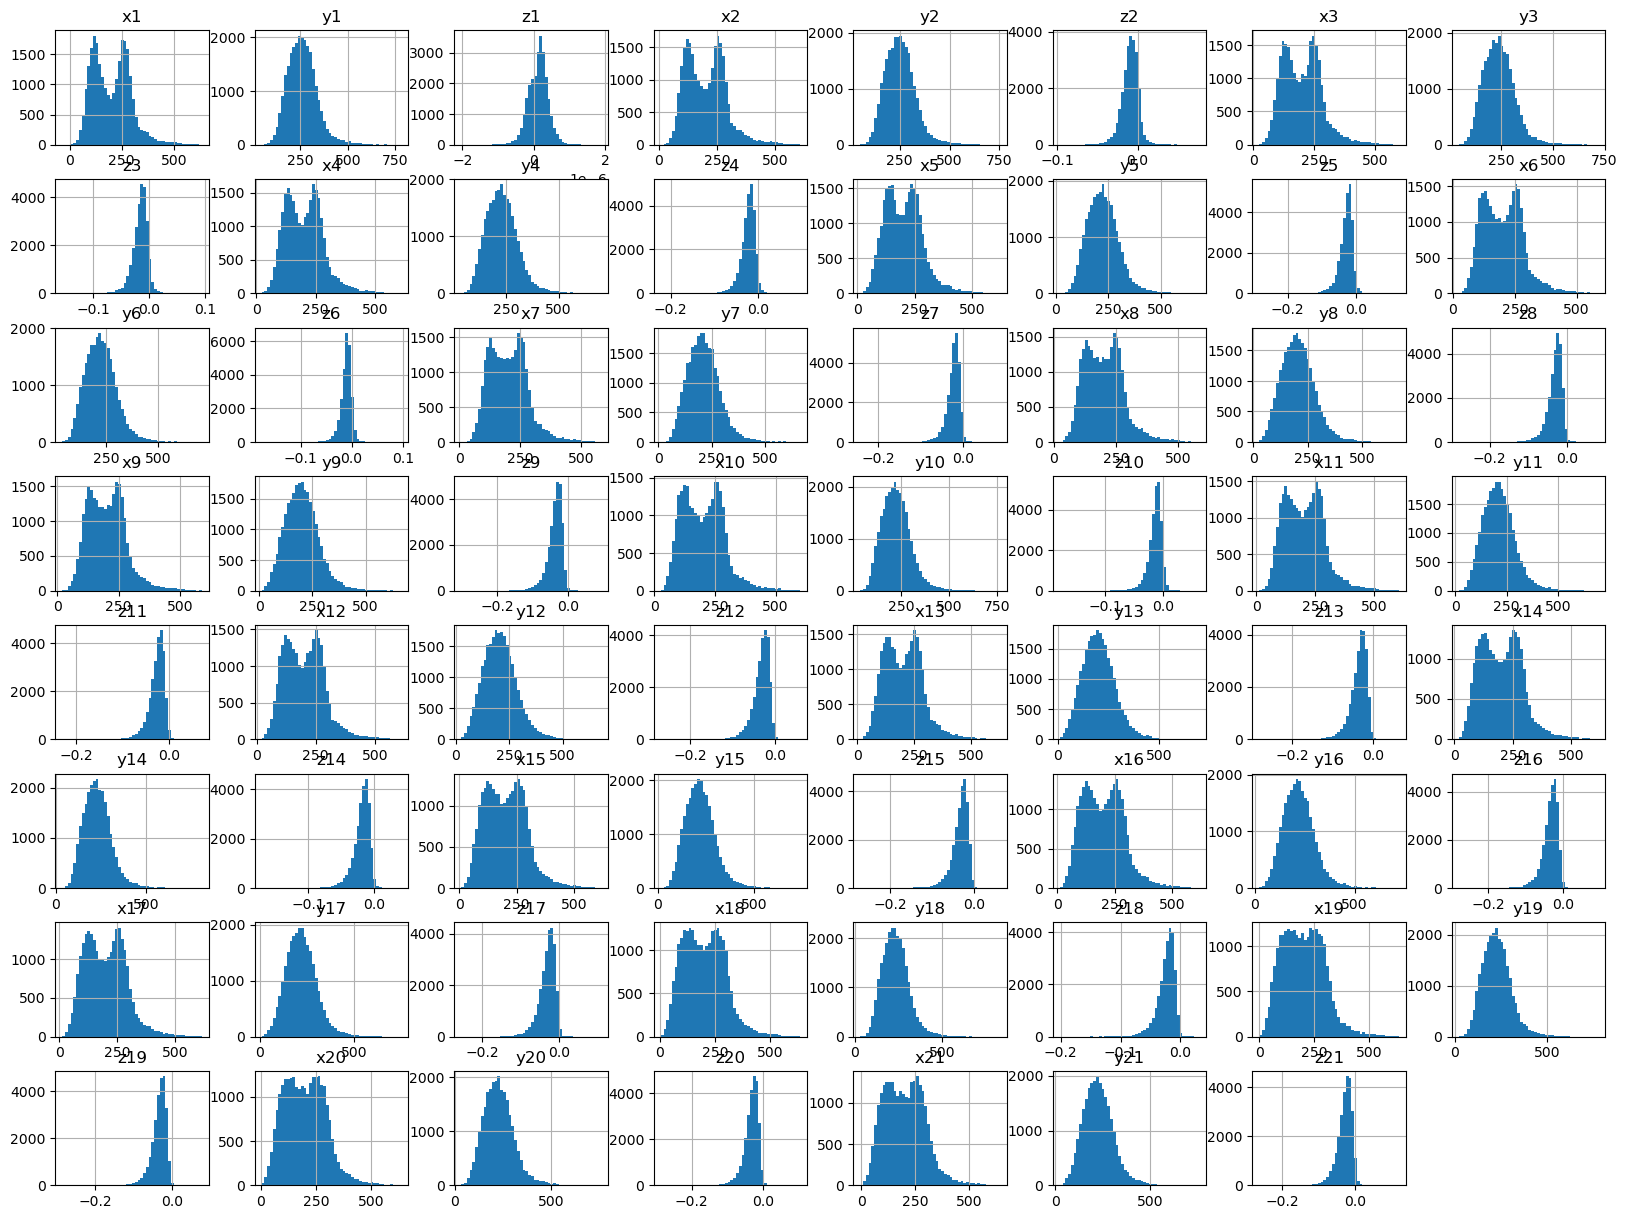

In [247]:
df.hist(bins = 50 , figsize=(20 ,15))

In [248]:
connections = [(0, 1), (1, 2), (2, 3), (3, 4),
               (0, 5), (5, 6), (6, 7), (7, 8),
               (0, 9), (9, 10), (10, 11), (11, 12),
               (0, 13), (13, 14), (14, 15), (15, 16),
               (0, 17), (17, 18), (18, 19), (19, 20)]

In [249]:
import random
random_idx = random.randint(0, df.shape[0] - 1 )
sample = df.iloc[random_idx, :-1]
label = df.iloc[random_idx, -1]
print(random_idx)
print(label)
print(sample.shape)

14235
peace_inverted
(63,)


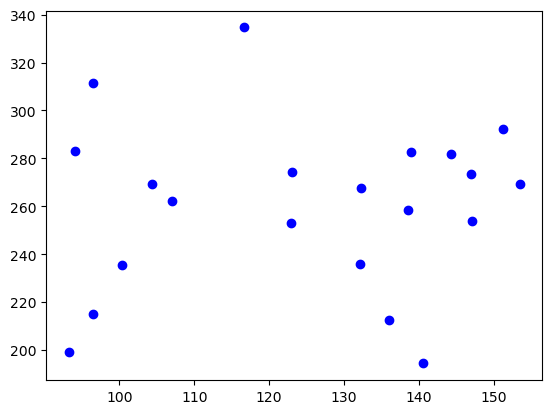

In [250]:
landmarks = np.array(sample).reshape(21, 3)
x = landmarks[:, 0]
y = landmarks[:, 1]
z = landmarks[:, 2]

plt.scatter(x, y, color='blue')

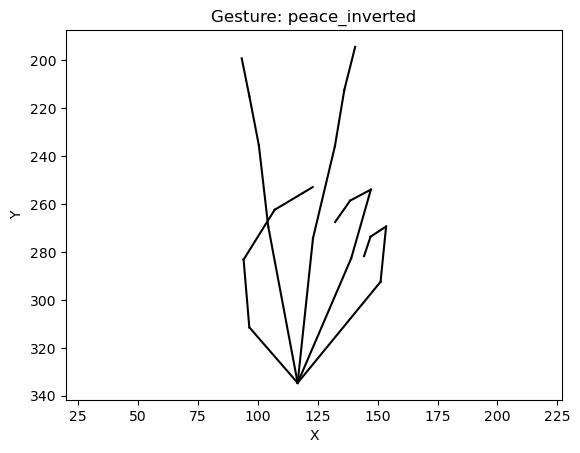

In [251]:
for start, end in connections:
    plt.plot([x[start], x[end]], [y[start], y[end]], 'black')
plt.gca().invert_yaxis()
plt.xlabel("X")
plt.ylabel("Y")
plt.title(f"Gesture: {label}")
plt.axis("equal")
plt.show()

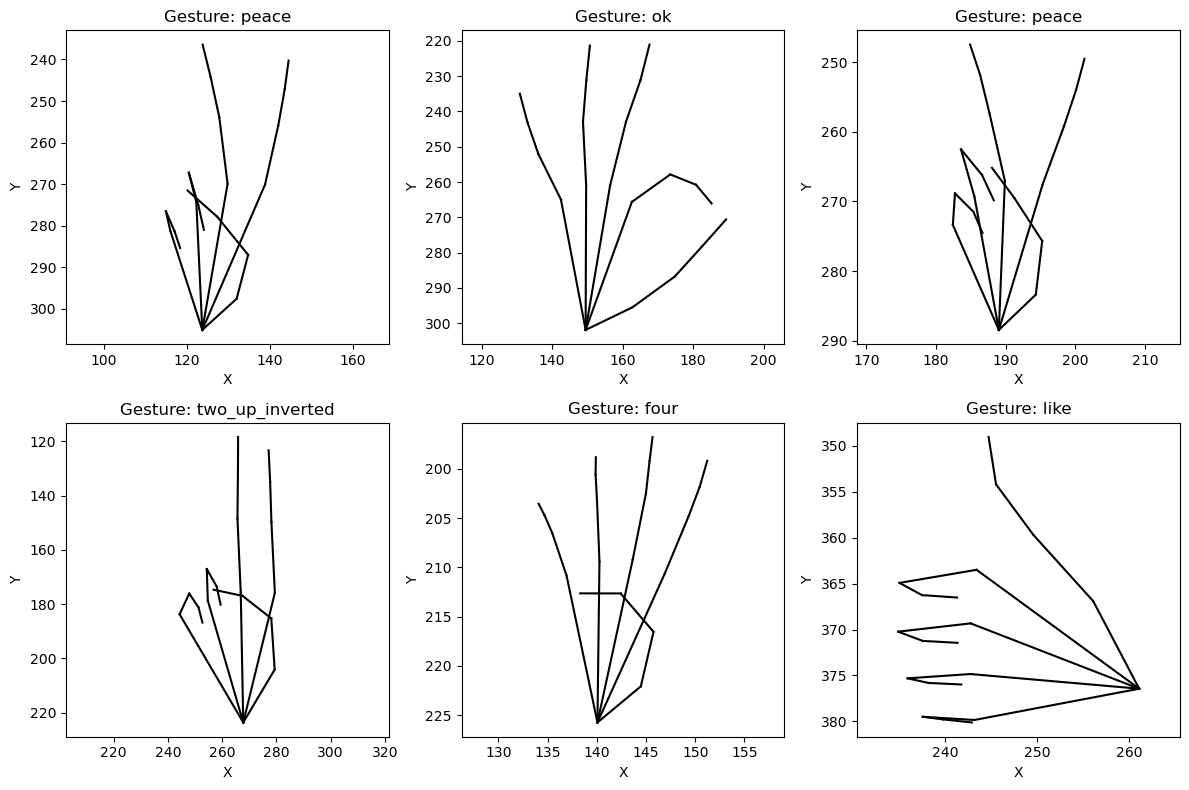

In [252]:
fig = plt.figure(figsize=(12, 8))
for i in range(6):
    random_idx = random.randint(0, df.shape[0] - 1)
    sample = df.iloc[random_idx, :-1]
    label = df.iloc[random_idx, -1]
    landmarks = np.array(sample).reshape(21, 3)
    x = landmarks[:, 0]
    y = landmarks[:, 1]

    plt.subplot(2, 3, i + 1)

    for start, end in connections:
        plt.plot([x[start], x[end]], [y[start], y[end]], 'black')
    plt.gca().invert_yaxis()
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.title(f"Gesture: {label}")
    plt.axis("equal")
plt.tight_layout()
plt.show()

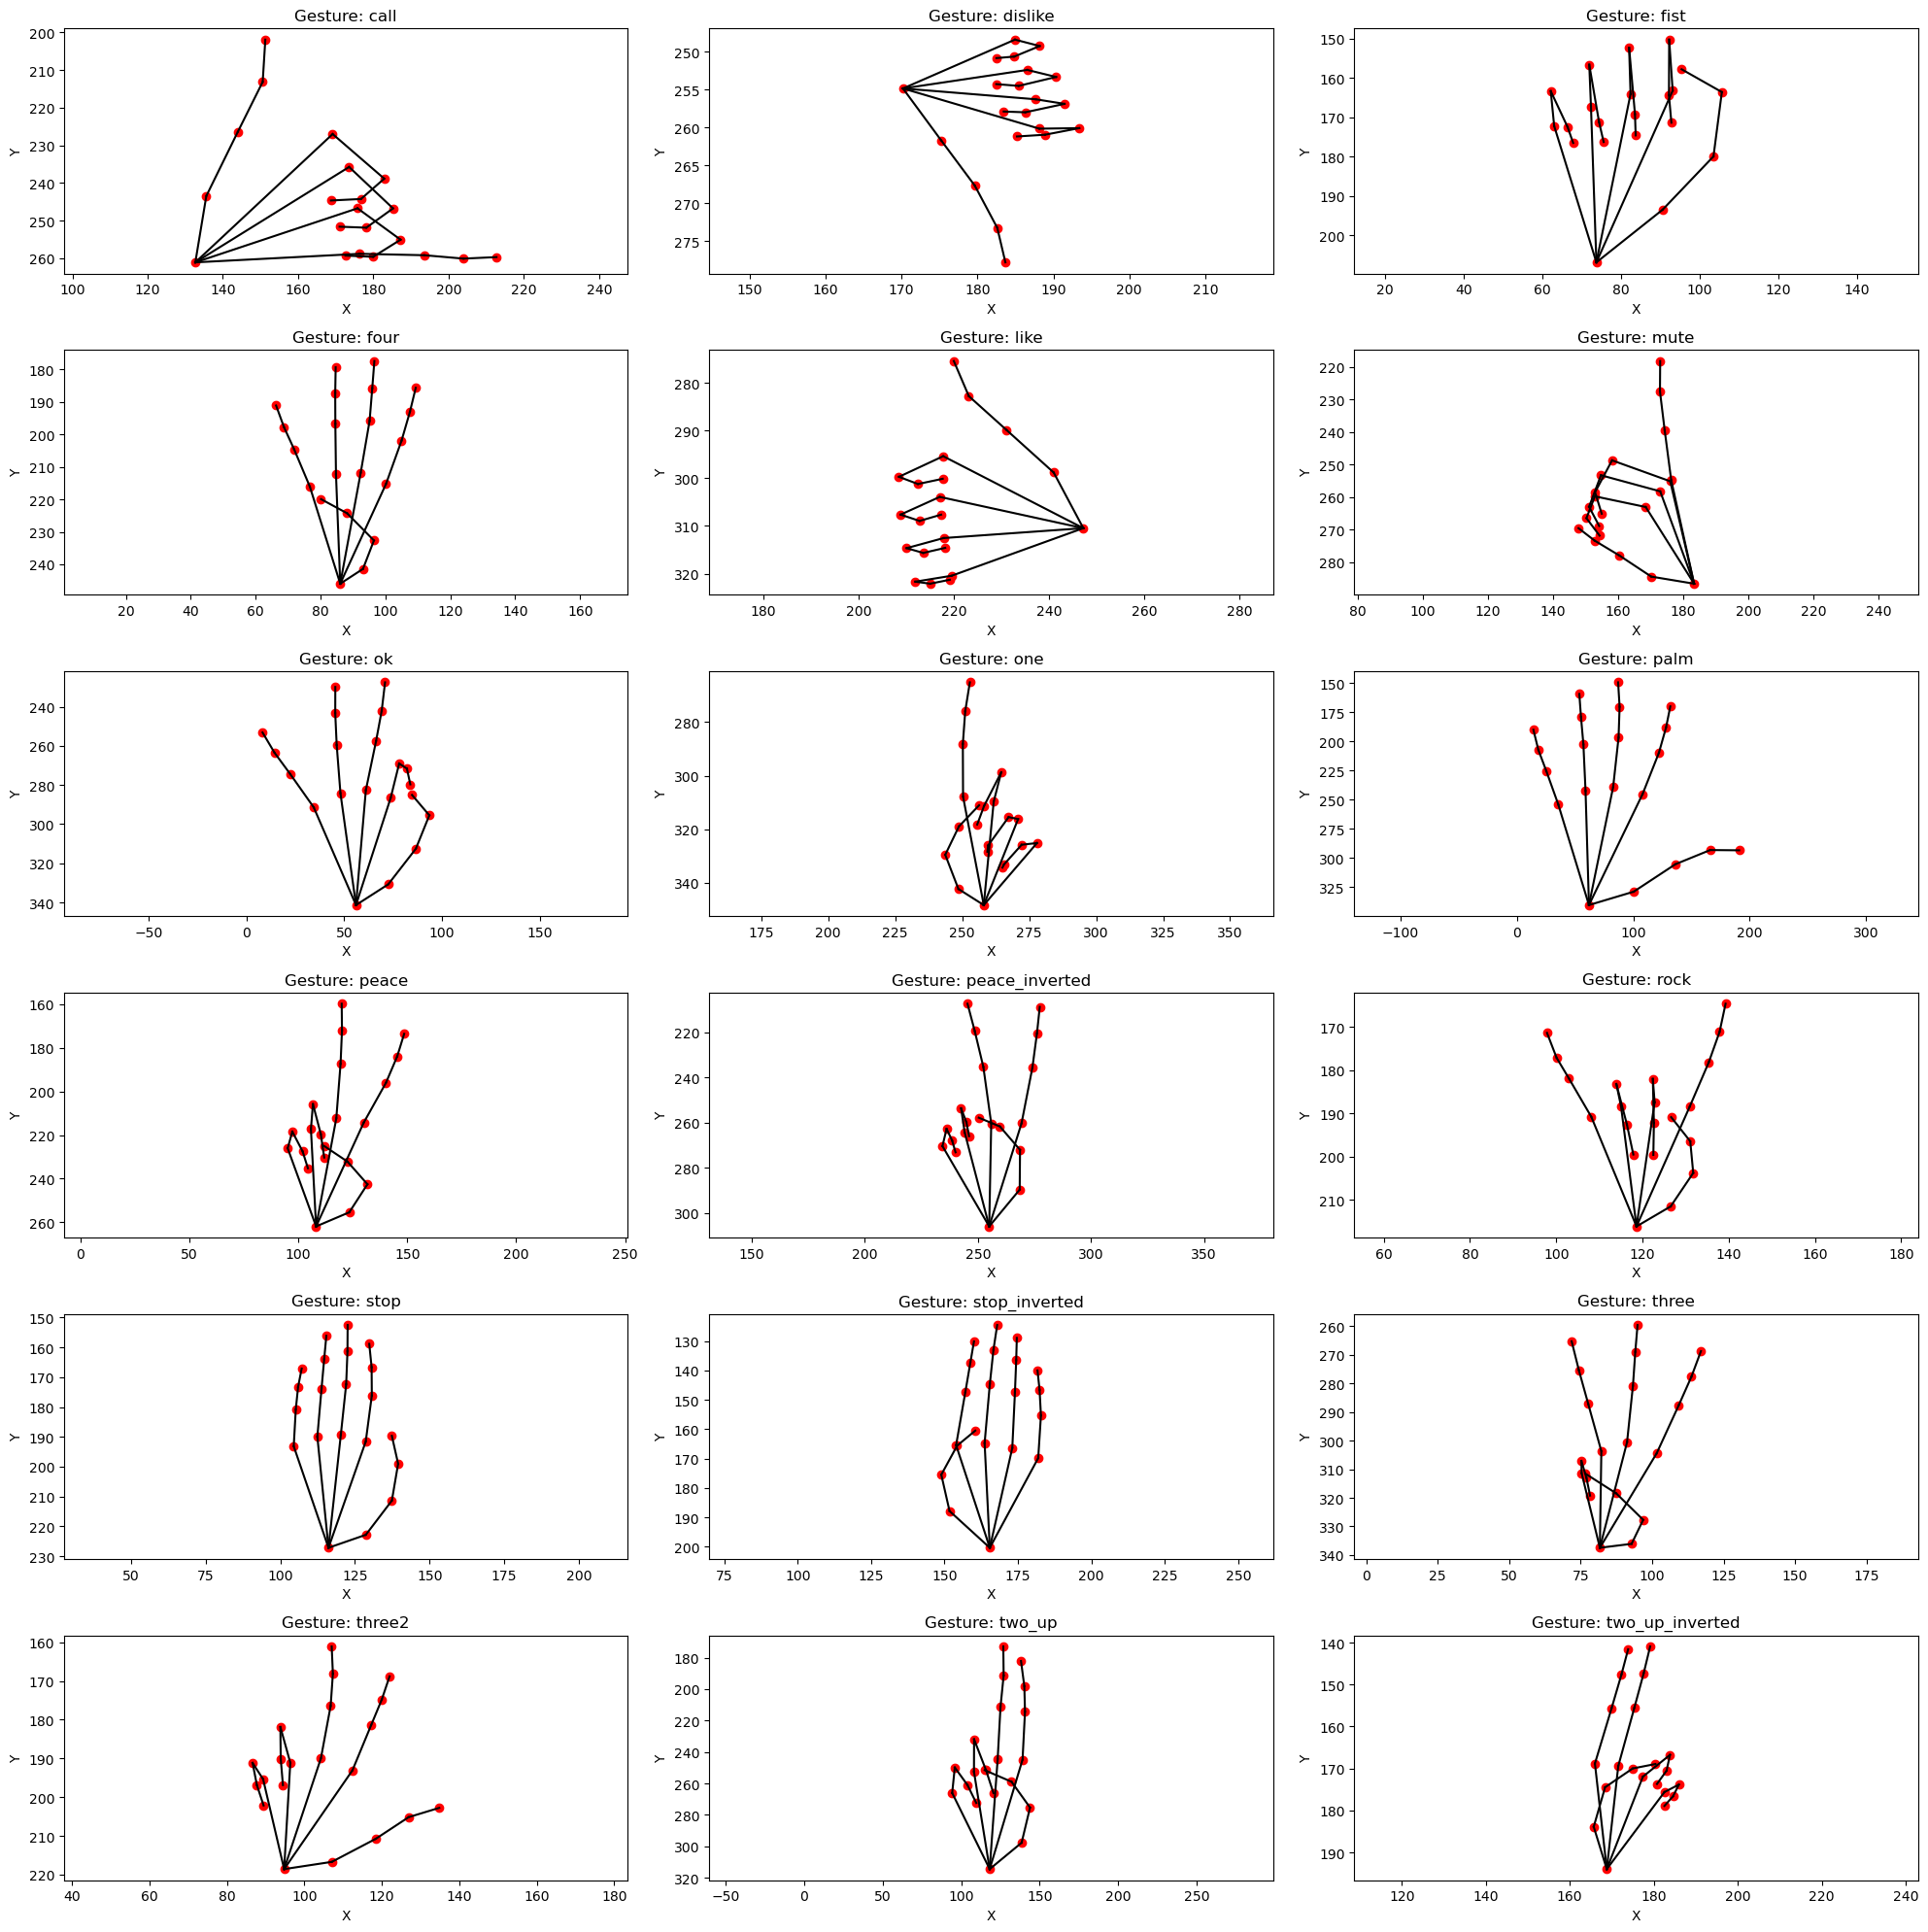

In [253]:
fig = plt.figure(figsize=(20, 20))

for i, label in enumerate(gesture_labels):
    gesture_data = df[df['label'] == label]
    sample = gesture_data.iloc[random.randint(0, gesture_data.shape[0] - 1), :-1]
    landmarks = np.array(sample).reshape(21, 3)
    
    x = landmarks[:, 0]
    y = landmarks[:, 1]
    z = landmarks[: ,2]

    plt.subplot(6, 3, i + 1)  
    for start, end in connections:
        plt.plot([x[start], x[end]], [y[start], y[end]], 'black')
        
    plt.scatter(x, y, color='red', marker='o', label="Landmarks")
    plt.gca().invert_yaxis()
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.title(f"Gesture: {label}")
    plt.axis("equal")

plt.tight_layout()
plt.show()

# Data Preprocessing

In [255]:
df.isnull().sum()

x1       0
y1       0
z1       0
x2       0
y2       0
        ..
z20      0
x21      0
y21      0
z21      0
label    0
Length: 64, dtype: int64

In [256]:
df.dropna(inplace=True)

In [257]:
df.duplicated().sum()

0

In [258]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['label'] = le.fit_transform(df['label'])

In [259]:
df['label'].value_counts()

label
15    1653
8     1649
3     1634
6     1592
13    1567
0     1506
10    1497
12    1482
11    1458
14    1456
9     1441
4     1436
17    1371
16    1343
1     1295
7     1263
5     1087
2      945
Name: count, dtype: int64

In [260]:
df.head()

,x1,y1,z1,x2,y2,z2,x3,y3,z3,x4,...,x19,y19,z19,x20,y20,z20,x21,y21,z21,label
0,262.669968,257.304901,-3.649205e-07,257.417542,247.109055,0.004224,246.882957,241.716827,0.005798,236.384537,...,223.345093,255.490692,-0.020450,215.043365,258.114746,-0.024577,208.006393,259.608673,-0.026722,0
1,83.351778,346.059113,-2.345265e-07,81.925037,328.562347,-0.011102,90.080132,311.535248,-0.021096,95.641823,...,132.451618,341.794434,-0.038175,142.773582,342.829254,-0.037336,152.431698,343.015991,-0.036136,0
2,187.756977,260.235492,-2.417307e-07,195.460579,241.506035,-0.000184,207.259529,223.674339,-0.009687,215.413628,...,250.301010,268.602938,-0.044068,262.425133,271.276638,-0.040469,272.989952,272.272231,-0.038301,0
3,114.976696,331.594238,-1.233261e-07,114.503494,320.549957,-0.002824,116.636627,310.080994,-0.008911,117.685066,...,145.195450,329.357544,-0.027622,151.053200,329.712341,-0.027863,155.990364,329.548828,-0.027723,0
4,188.795288,141.727867,-1.622995e-07,188.520905,127.947464,-0.002884,191.982880,111.010563,-0.008115,192.552521,...,226.696396,132.263248,-0.025113,234.831741,130.684147,-0.024087,241.587769,128.477188,-0.023486,0


In [261]:
random_idx = random.randint(0 , df.shape[0])
data = df.iloc[random_idx , : -1]
label = df.iloc[random_idx , -1]
print(random_idx)
print(label)
print(data.shape)

14520
10
(63,)


In [262]:
landmarks = np.array(data).reshape(21 , 3)
x = landmarks[: , 0]
y = landmarks[ : , 1]
z = landmarks[ : , 2]
print(landmarks.shape)
print(landmarks)

(21, 3)
[[ 1.53662739e+02  2.62856740e+02  2.62743299e-07]
 [ 1.48402840e+02  2.53121154e+02 -1.31489371e-03]
 [ 1.50366955e+02  2.43358088e+02 -4.57877386e-03]
 [ 1.57577271e+02  2.39010100e+02 -8.76440946e-03]
 [ 1.63099365e+02  2.38198160e+02 -1.30420746e-02]
 [ 1.50187054e+02  2.37418055e+02 -8.84211343e-03]
 [ 1.47921764e+02  2.25085559e+02 -1.67887490e-02]
 [ 1.45816372e+02  2.16376210e+02 -2.13966612e-02]
 [ 1.44518875e+02  2.09897890e+02 -2.39311475e-02]
 [ 1.57604794e+02  2.37800566e+02 -1.37516400e-02]
 [ 1.59707760e+02  2.23987164e+02 -2.05576885e-02]
 [ 1.60844158e+02  2.14339837e+02 -2.50389855e-02]
 [ 1.62585617e+02  2.06977581e+02 -2.73340531e-02]
 [ 1.63990356e+02  2.41057344e+02 -1.82915367e-02]
 [ 1.67080936e+02  2.32432549e+02 -2.59611383e-02]
 [ 1.64344311e+02  2.35476719e+02 -2.58295536e-02]
 [ 1.62386765e+02  2.39318845e+02 -2.30084304e-02]
 [ 1.68694862e+02  2.45686922e+02 -2.29044240e-02]
 [ 1.68869453e+02  2.41246299e+02 -2.70003229e-02]
 [ 1.66156918e+02  2.43

In [263]:
landmarks.shape[0]

21

In [264]:
wrist = landmarks[0 , :].copy()
for i in range(21):
  landmarks[i , :] = landmarks[i , :] - wrist
print(landmarks.shape)
print(landmarks)

(21, 3)
[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-5.25989914e+00 -9.73558635e+00 -1.31515646e-03]
 [-3.29578400e+00 -1.94986519e+01 -4.57903661e-03]
 [ 3.91453171e+00 -2.38466398e+01 -8.76467220e-03]
 [ 9.43662643e+00 -2.46585799e+01 -1.30423374e-02]
 [-3.47568512e+00 -2.54386847e+01 -8.84237617e-03]
 [-5.74097443e+00 -3.77711805e+01 -1.67890118e-02]
 [-7.84636688e+00 -4.64805295e+01 -2.13969239e-02]
 [-9.14386368e+00 -5.29588499e+01 -2.39314103e-02]
 [ 3.94205475e+00 -2.50561738e+01 -1.37519027e-02]
 [ 6.04502106e+00 -3.88695763e+01 -2.05579513e-02]
 [ 7.18141937e+00 -4.85169034e+01 -2.50392483e-02]
 [ 8.92287827e+00 -5.58791595e+01 -2.73343158e-02]
 [ 1.03276176e+01 -2.17993964e+01 -1.82917995e-02]
 [ 1.34181976e+01 -3.04241908e+01 -2.59614011e-02]
 [ 1.06815720e+01 -2.73800212e+01 -2.58298163e-02]
 [ 8.72402573e+00 -2.35378954e+01 -2.30086931e-02]
 [ 1.50321236e+01 -1.71698176e+01 -2.29046867e-02]
 [ 1.52067146e+01 -2.16104410e+01 -2.70005857e-02]
 [ 1.24941788e+01 -1.95

In [265]:
mid_finger_tip = landmarks[12 , :].copy()
distance = np.linalg.norm(mid_finger_tip)
if distance > 0 :
  for i in range(21):
    landmarks[i , :] = landmarks[i , :] / distance
print(landmarks.shape)
print(landmarks)

(21, 3)
[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-9.29522788e-02 -1.72046063e-01 -2.32412802e-05]
 [-5.82426820e-02 -3.44577735e-01 -8.09201614e-05]
 [ 6.91771141e-02 -4.21414832e-01 -1.54888189e-04]
 [ 1.66762880e-01 -4.35763335e-01 -2.30482553e-04]
 [-6.14218721e-02 -4.49549250e-01 -1.56261364e-04]
 [-1.01453781e-01 -6.67487572e-01 -2.96693313e-04]
 [-1.38660013e-01 -8.21398097e-01 -3.78123760e-04]
 [-1.61589214e-01 -9.35882163e-01 -4.22912885e-04]
 [ 6.96634978e-02 -4.42789565e-01 -2.43021903e-04]
 [ 1.06826855e-01 -6.86898284e-01 -3.63297540e-04]
 [ 1.26909144e-01 -8.57384641e-01 -4.42490460e-04]
 [ 1.57683987e-01 -9.87489507e-01 -4.83048606e-04]
 [ 1.82508366e-01 -3.85236202e-01 -3.23250389e-04]
 [ 2.37124708e-01 -5.37652489e-01 -4.58786628e-04]
 [ 1.88763402e-01 -4.83856305e-01 -4.56461279e-04]
 [ 1.54169890e-01 -4.15958739e-01 -4.06606743e-04]
 [ 2.65645805e-01 -3.03422866e-01 -4.04768755e-04]
 [ 2.68731156e-01 -3.81897007e-01 -4.77150968e-04]
 [ 2.20795562e-01 -3.45

In [266]:
for i in range(df.shape[0]):
  data = df.iloc[i , : -1]
  label = df.iloc[i , -1]
  landmarks = np.array(data).reshape(21 , 3)

  wrist = landmarks[0 , :].copy()
  for j in range(21):
    landmarks[j , :] = landmarks[j , :] - wrist

  mid_finger_tip = landmarks[12 , :].copy()
  distance = np.linalg.norm(mid_finger_tip)
  if distance > 0 :
    for j in range(21):
      landmarks[j , :] = landmarks[j , :] / distance

  df.iloc[i , : -1] = landmarks.flatten()
  df.iloc[i , -1] = label

In [267]:
print(landmarks.shape)  
print(landmarks.flatten().shape)

(21, 3)
(63,)


In [268]:
df.head()

,x1,y1,z1,x2,y2,z2,x3,y3,z3,x4,...,x19,y19,z19,x20,y20,z20,x21,y21,z21,label
0,0.0,0.0,0.0,-0.169097,-0.328246,0.000136,-0.508248,-0.501843,0.000187,-0.846234,...,-1.266027,-0.058407,-0.000658,-1.533293,0.026072,-0.000791,-1.759842,0.074168,-0.000860,0
1,0.0,0.0,0.0,-0.040618,-0.498120,-0.000316,0.191551,-0.982869,-0.000601,0.349888,...,1.397836,-0.121412,-0.001087,1.691695,-0.091952,-0.001063,1.966654,-0.086635,-0.001029,0
2,0.0,0.0,0.0,0.172978,-0.420554,-0.000004,0.437913,-0.820949,-0.000218,0.621006,...,1.404372,0.187884,-0.000990,1.676609,0.247919,-0.000909,1.913833,0.270275,-0.000860,0
3,0.0,0.0,0.0,-0.020056,-0.468103,-0.000120,0.070355,-0.911821,-0.000378,0.114792,...,1.280797,-0.094800,-0.001171,1.529073,-0.079763,-0.001181,1.738330,-0.086693,-0.001175,0
4,0.0,0.0,0.0,-0.009611,-0.482677,-0.000101,0.111650,-1.075914,-0.000284,0.131602,...,1.327536,-0.331511,-0.000880,1.612487,-0.386821,-0.000844,1.849126,-0.464122,-0.000823,0


In [269]:
X = df.iloc[: , :-1]
y = df.iloc[: , -1]
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2 , random_state = 42 , stratify = y , shuffle =True )

In [270]:
X_validate , X_test , y_validate , y_test = train_test_split(X_test , y_test , test_size = 0.5 , random_state = 42 , stratify = y_test , shuffle =True )

In [271]:
X.head()

,x1,y1,z1,x2,y2,z2,x3,y3,z3,x4,...,z18,x19,y19,z19,x20,y20,z20,x21,y21,z21
0,0.0,0.0,0.0,-0.169097,-0.328246,0.000136,-0.508248,-0.501843,0.000187,-0.846234,...,-0.000425,-1.266027,-0.058407,-0.000658,-1.533293,0.026072,-0.000791,-1.759842,0.074168,-0.000860
1,0.0,0.0,0.0,-0.040618,-0.498120,-0.000316,0.191551,-0.982869,-0.000601,0.349888,...,-0.000827,1.397836,-0.121412,-0.001087,1.691695,-0.091952,-0.001063,1.966654,-0.086635,-0.001029
2,0.0,0.0,0.0,0.172978,-0.420554,-0.000004,0.437913,-0.820949,-0.000218,0.621006,...,-0.000926,1.404372,0.187884,-0.000990,1.676609,0.247919,-0.000909,1.913833,0.270275,-0.000860
3,0.0,0.0,0.0,-0.020056,-0.468103,-0.000120,0.070355,-0.911821,-0.000378,0.114792,...,-0.000924,1.280797,-0.094800,-0.001171,1.529073,-0.079763,-0.001181,1.738330,-0.086693,-0.001175
4,0.0,0.0,0.0,-0.009611,-0.482677,-0.000101,0.111650,-1.075914,-0.000284,0.131602,...,-0.000757,1.327536,-0.331511,-0.000880,1.612487,-0.386821,-0.000844,1.849126,-0.464122,-0.000823


In [272]:
print(X_train.shape)
print(X_test.shape)

(20540, 63)
(2568, 63)


In [273]:
y_train.head()

11158     8
7813      5
11589     8
2130      1
15369    11
Name: label, dtype: int32

# Model Training and Evaluation

In [275]:
#Random Forest Model
random_forest_model = RandomForestClassifier(random_state=42 , n_estimators=100)
random_forest_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [414]:
#SVM
svm_model = SVC(random_state=42 , C=1, kernel='rbf')
svm_model.fit(X_train, y_train)

SVC(C=1, random_state=42)

In [277]:
#Xgboost
xgboost_model = XGBClassifier(random_state=42)
xgboost_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [416]:
print("Scores of the models")
print("SVM:",svm_model.score(X_validate , y_validate) )
print("Random forest:", random_forest_model.score(X_validate , y_validate))
print("XG boosting:", xgboost_model.score(X_validate , y_validate))

Scores of the models
SVM: 0.9306583560576549
Random forest: 0.9777950915465524
XG boosting: 0.983248928710557


In [412]:
svm_model_pred = svm_model.predict(X_validate_scaled)
random_forest_model_pred = random_forest_model.predict(X_validate)
xgboost_model_pred = xgboost_model.predict(X_validate)

In [85]:
print('Precision of the models')
print("SVM:", precision_score(y_validate, svm_model_pred, average='weighted'))
print("Random forest:", precision_score(y_validate, random_forest_model_pred, average='weighted'))
print("XG boosting:", precision_score(y_validate, xgboost_model_pred, average='weighted'))

Precision of the models
SVM: 0.9331911166506945
Random forest: 0.9781011596965872
XG boosting: 0.9833599072200173


In [87]:
print("F1-scores of the models:")
print("SVM:", f1_score(y_validate, svm_model_pred , average='weighted'))
print("Random forest:", f1_score(y_validate, random_forest_model_pred, average='weighted'))
print("XG boosting:", f1_score(y_validate, xgboost_model_pred, average='weighted'))

F1-scores of the models:
SVM: 0.9306546439908735
Random forest: 0.9778343500892829
XG boosting: 0.983261705529819


# Hyperparameter Tuning using Grid Search

In [171]:
random_forest_parameters = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30]
}
rf = RandomForestClassifier(random_state=42)
rf_grid_search = GridSearchCV(estimator=rf, param_grid=random_forest_parameters)
rf_grid_search.fit(X_train, y_train)

rf_winner = rf_grid_search.best_estimator_
rf_winner.score(X_validate , y_validate)

0.9797428905336969

In [173]:
rf_winner

RandomForestClassifier(n_estimators=200, random_state=42)

In [185]:
y_pred = rf_winner.predict(X_validate)
print(f1_score(y_validate, y_pred, average='weighted'))

0.9797978483632902


In [189]:
joblib.dump(rf_winner, 'rf_winner.pkl')

['rf_winner.pkl']

In [424]:
svm_parameters = {'kernel': ['rbf'],
                  'C': [0.01, 0.1, 1 , 10, 100],
                  'gamma': [0.01, 0.1, 1]
                }
svm = SVC(random_state=42)
svm_grid_search = GridSearchCV(estimator=svm , param_grid= svm_parameters)
svm_grid_search.fit(X_train , y_train)

svm_winner = svm_grid_search.best_estimator_
svm_winner

svm_winner.score(X_validate,y_validate)

0.9898714452668484

In [426]:
svm_winner

SVC(C=100, gamma=0.1, random_state=42)

In [428]:
y_pred = svm_winner.predict(X_validate)
print(f1_score(y_validate, y_pred, average='weighted'))

0.9898828053109202


In [430]:
joblib.dump(svm_winner, 'svm_winner.pkl')

['svm_winner.pkl']

In [372]:
xgboost_parameters = {
    'n_estimators': [100 , 300 , 500 , 600],  
    'max_depth': [3, 5 , 7], 
    'learning_rate': [ 0.1, 0.2 , 0.3]
}
xgb_model = XGBClassifier(random_state=42)
xgboost_grid_search = GridSearchCV(xgb_model, param_grid = xgboost_parameters)
xgboost_grid_search.fit(X_train, y_train)

xgboost_winner = xgboost_grid_search.best_estimator_
xgboost_winner.score(X_validate,y_validate)

0.9848071679002727

In [374]:
xgboost_winner

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.2, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=500,
              n_jobs=None, num_parallel_tree=None, ...)

In [432]:
y_pred = xgboost_winner.predict(X_validate)
print(f1_score(y_validate, y_pred, average='weighted'))

0.9848226570892046


In [434]:
joblib.dump(xgboost_winner, 'xgboost_winner.pkl')

['xgboost_winner.pkl']

In [441]:
svm_pred_v = svm_winner.predict(X_validate) 
xgb_pred_v = xgboost_winner.predict(X_validate)
rf_pred_V = rf_winner.predict(X_validate)

In [443]:
print('Precision of the models')
print("SVM:", precision_score(y_validate, svm_pred_v, average='weighted'))
print("Random forest:", precision_score(y_validate, rf_pred_V, average='weighted'))
print("XG boosting:", precision_score(y_validate, xgb_pred_v, average='weighted'))

Precision of the models
SVM: 0.9899356612016754
Random forest: 0.9800756287342729
XG boosting: 0.9850020345499696


In [459]:
models = ['SVM', 'XGBoost', 'Random Forest']
predictions = [svm_pred_v, xgb_pred_v, rf_pred_V]
accuracy_scores = []
f1_scores = []

In [471]:
for i, pred in enumerate(predictions):
    acc = accuracy_score(y_validate, pred)
    f1 = f1_score(y_validate, pred, average='weighted')
    accuracy_scores.append(acc)
    f1_scores.append(f1)
    
    print(f"=== {models[i]} Performance ===")
    print(f"Best Parameters: {svm_grid_search.best_params_ if i==0 else (xgboost_grid_search.best_params_ if i==1 else rf_grid_search.best_params_)}")
    print(f"Accuracy: {acc:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(classification_report(y_validate, pred))
    print("-" * 50)

=== SVM Performance ===
Best Parameters: {'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}
Accuracy: 0.9899
F1 Score: 0.9899
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       150
           1       1.00      1.00      1.00       130
           2       0.99      0.99      0.99        95
           3       0.99      0.99      0.99       163
           4       0.99      0.99      0.99       143
           5       0.96      0.96      0.96       109
           6       1.00      0.99      1.00       159
           7       0.97      0.98      0.98       127
           8       0.98      1.00      0.99       165
           9       0.99      0.99      0.99       144
          10       1.00      0.99      0.99       149
          11       1.00      0.99      0.99       146
          12       0.99      0.99      0.99       148
          13       0.99      0.99      0.99       157
          14       1.00      0.99      1.00       145
          15      

In [495]:
results_df = pd.DataFrame({
    'Model': models,
    'Accuracy': accuracy_scores[1:],
    'F1 Score': f1_scores[1:]
})

results_df

,Model,Accuracy,F1 Score
0,SVM,0.989871,0.989883
1,XGBoost,0.984807,0.984823
2,Random Forest,0.979743,0.979798


**Conclusion : By Comparing the results we got after we chose the best hyper parameters we can say that even though SVM and Xgboost models have great performance but the SVM model has a slightly better performance than xgboost model when it comes to accuracy and f1-score.
So as a result we will choose SVM model to apply on out test dataset**

In [502]:
print(svm_winner.score(X_test , y_test))

0.9890965732087228


In [504]:
svm_winner_pred_test = svm_winner.predict(X_test)
print(f1_score(y_test, svm_winner_pred_test, average='weighted'))

0.9891003682865808


In [506]:
print(classification_report(y_test, svm_winner_pred_test))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       151
           1       1.00      0.99      1.00       129
           2       1.00      1.00      1.00        94
           3       0.99      0.99      0.99       164
           4       0.99      1.00      1.00       144
           5       0.96      0.98      0.97       108
           6       0.99      0.99      0.99       159
           7       0.97      0.98      0.97       126
           8       0.99      0.99      0.99       165
           9       0.99      0.99      0.99       144
          10       1.00      0.98      0.99       150
          11       0.99      1.00      0.99       146
          12       0.97      0.98      0.98       148
          13       0.98      1.00      0.99       157
          14       0.99      0.97      0.98       146
          15       0.99      0.99      0.99       166
          16       1.00      0.99      1.00       134
          17       0.99    

In [508]:
confusion_matrix(y_test, svm_winner_pred_test)

array([[149,   0,   0,   0,   1,   1,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0],
       [  1, 128,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0],
       [  0,   0,  94,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0],
       [  0,   0,   0, 163,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   1,   0,   0,   0],
       [  0,   0,   0,   0, 144,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0, 106,   0,   0,   0,   0,   0,   2,   0,
          0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0, 157,   0,   1,   0,   0,   0,   1,
          0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   3,   0, 123,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 164,   0,   0,   0,   1,
          0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,

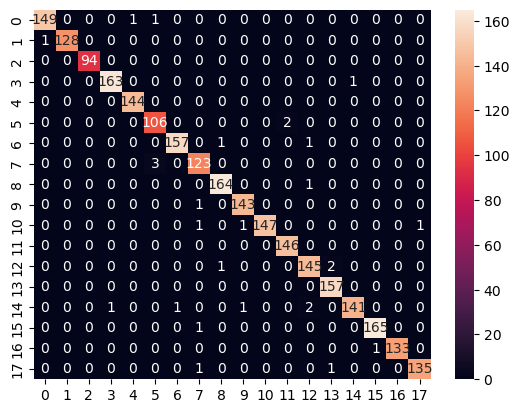

In [510]:
sns.heatmap(confusion_matrix(y_test, svm_winner_pred_test), annot=True, fmt='d')
plt.show()

# Output Video

In [514]:
svm_model = joblib.load('svm_winner.pkl')

In [516]:
df['label'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17])

In [518]:
classes = ['call', 'dislike', 'fist', 'four', 'like', 'mute', 'ok', 'one',
       'palm', 'peace', 'peace_inverted', 'rock', 'stop', 'stop_inverted',
       'three', 'three2', 'two_up', 'two_up_inverted']

In [520]:
hands = mp.solutions.hands.Hands(static_image_mode=False, max_num_hands=1, min_detection_confidence=0.5)
mp_draw = mp.solutions.drawing_utils

In [583]:
cap = cv2.VideoCapture(0)
frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
out = cv2.VideoWriter('output_video_2.avi', cv2.VideoWriter_fourcc(*'XVID'), 20.0, (frame_width, frame_height))

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    result = hands.process(rgb_frame)

    if result.multi_hand_landmarks:
        for hand_landmarks in result.multi_hand_landmarks:
            landmarks = np.array([[lm.x, lm.y, lm.z] for lm in hand_landmarks.landmark]) 

            wrist = landmarks[0]  
            landmarks = landmarks - wrist

            mid_finger_tip = landmarks[12]  
            landmarks = landmarks / np.linalg.norm(mid_finger_tip)

            landmarks = landmarks.flatten().reshape(1, -1) 

            prediction = svm_model.predict(landmarks)[0]
            predicted_gesture = classes[prediction]

            mp_draw.draw_landmarks(frame, hand_landmarks, mp.solutions.hands.HAND_CONNECTIONS)

            cv2.putText(frame, f"Gesture: {predicted_gesture}", (10, 50), cv2.FONT_HERSHEY_SIMPLEX,
                        1, (0, 255, 0), 2, cv2.LINE_AA)
    out.write(frame)
    cv2.imshow(" Hand Gesture Classification", frame)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
out.release()
cv2.destroyAllWindows()